In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
100% 25.7M/25.7M [00:02<00:00, 19.4MB/s]
100% 25.7M/25.7M [00:02<00:00, 11.3MB/s]


In [4]:
!unzip imdb-dataset-of-50k-movie-reviews.zip


Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers

In [6]:
dataset = pd.read_csv("IMDB Dataset.csv")

In [7]:
dataset

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [8]:
dataset['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [9]:
X = dataset['review'].values
print(X)

["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the f

In [10]:
dic = {'positive': 1, 'negative': 0}
y = [dic[i] for i in dataset['sentiment']]
print(y)

[1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 

In [11]:
# Tokenize the text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)

# Pad sequences to ensure uniform input size
X = pad_sequences(X, maxlen=200)

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.optimizers import Adam

In [32]:
# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [33]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


In [34]:
# Train the model
hist = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.25)

Epoch 1/5
440/440 [==============================] - 350s 785ms/step - loss: 0.3903 - accuracy: 0.8223 - val_loss: 0.3260 - val_accuracy: 0.8682
Epoch 2/5
440/440 [==============================] - 330s 751ms/step - loss: 0.2740 - accuracy: 0.8927 - val_loss: 0.2934 - val_accuracy: 0.8758
Epoch 3/5
440/440 [==============================] - 327s 744ms/step - loss: 0.2311 - accuracy: 0.9090 - val_loss: 0.3199 - val_accuracy: 0.8685
Epoch 4/5
440/440 [==============================] - 325s 738ms/step - loss: 0.1920 - accuracy: 0.9255 - val_loss: 0.3220 - val_accuracy: 0.8637
Epoch 5/5
440/440 [==============================] - 326s 741ms/step - loss: 0.1873 - accuracy: 0.9281 - val_loss: 0.3407 - val_accuracy: 0.8535


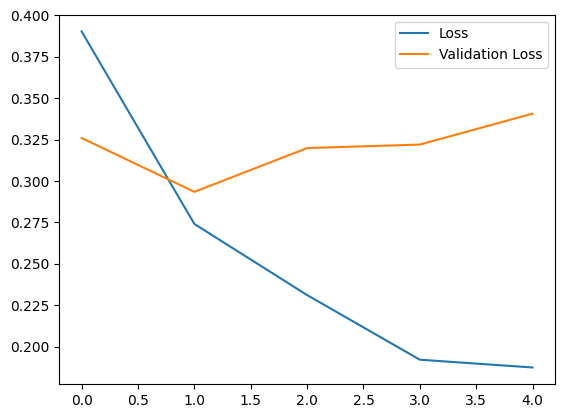

In [35]:
plt.plot(hist.history['loss'], label='Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

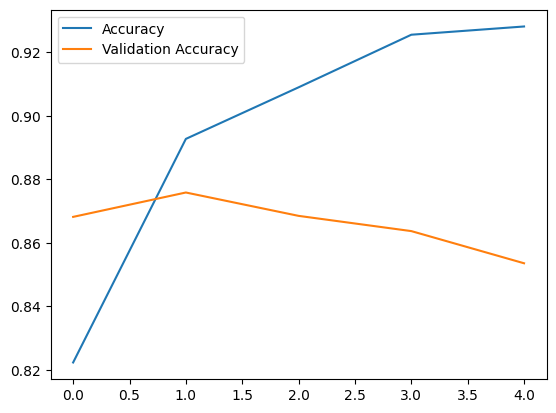

In [36]:
plt.plot(hist.history['accuracy'], label='Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [37]:
loss, accuracy = model.evaluate(X_test, y_test)

391/391 [==============================] - 28s 71ms/step - loss: 0.3357 - accuracy: 0.8548


In [38]:
print(accuracy)

0.8547999858856201


In [26]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "sentiment_analysis.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(model, file)

In [27]:
# load model from pickle file
with open(model_pkl_file, 'rb') as file:
    model = pickle.load(file)

In [39]:
y_pred_prob = model.predict(X_test)

391/391 [==============================] - 27s 70ms/step


In [40]:
y_pred_prob

array([[0.8898331 ],
       [0.942475  ],
       [0.17525524],
       ...,
       [0.42272308],
       [0.99985886],
       [0.9915466 ]], dtype=float32)

In [30]:
y_pred = [np.argmax(i) for i in y_pred_prob]

In [31]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Precision: ", precision)
print("Recall: ", recall)

Precision:  0.24261535360000003
Recall:  0.49256


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
